# **Experiment 3: Clustering on Iris Dataset**

### Objective: Implement any clustering techniques using Scikit-learn on cleaned data from a previous lab. Analyze the performance of the clustering algorithm and discuss the results.

### **Step 1: Import libraries and read dataset**

In [6]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score
import matplotlib.pyplot as plt

# Step 1: Load the dataset
file_path = 'Iris_Dataset.csv'  # Update with the correct file path
iris_data = pd.read_csv(file_path)

# Display the first few rows
print("Dataset Preview:")
iris_data.head()

Dataset Preview:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### **Step 2: Data Preprocessing**

In [7]:
# Select feature columns (excluding the Target column)
features = iris_data.drop(columns=["Target"])

# Apply Min-Max Scaling
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(features)

# Convert scaled features back to a DataFrame
scaled_data = pd.DataFrame(scaled_features, columns=features.columns)

### **Step 3: Perform Clustering (K-Means)**

In [8]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(scaled_data)
kmeans_labels = kmeans.labels_

# Add K-Means cluster labels for visualization
scaled_data["KMeans_Cluster"] = kmeans_labels

### **Step 4: Perform Clustering (DBSCAN)**

In [9]:
dbscan = DBSCAN(eps=0.3, min_samples=5)
dbscan_labels = dbscan.fit_predict(scaled_data.drop(columns=["KMeans_Cluster"]))

# Add DBSCAN cluster labels for visualization
scaled_data["DBSCAN_Cluster"] = dbscan_labels

### **Step 5: Visualization**

#### *K-Means Clustering Visualization*

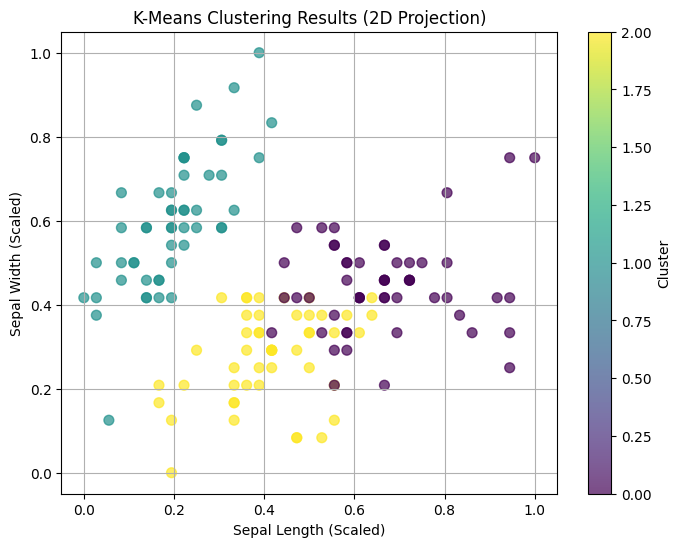

In [10]:
plt.figure(figsize=(8, 6))
plt.scatter(
    scaled_data["sepal length (cm)"],
    scaled_data["sepal width (cm)"],
    c=scaled_data["KMeans_Cluster"],
    cmap="viridis",
    s=50,
    alpha=0.7,
)
plt.title("K-Means Clustering Results (2D Projection)")
plt.xlabel("Sepal Length (Scaled)")
plt.ylabel("Sepal Width (Scaled)")
plt.colorbar(label="Cluster")
plt.grid(True)
plt.show()

#### *DBSCAN Clustering Visualization*

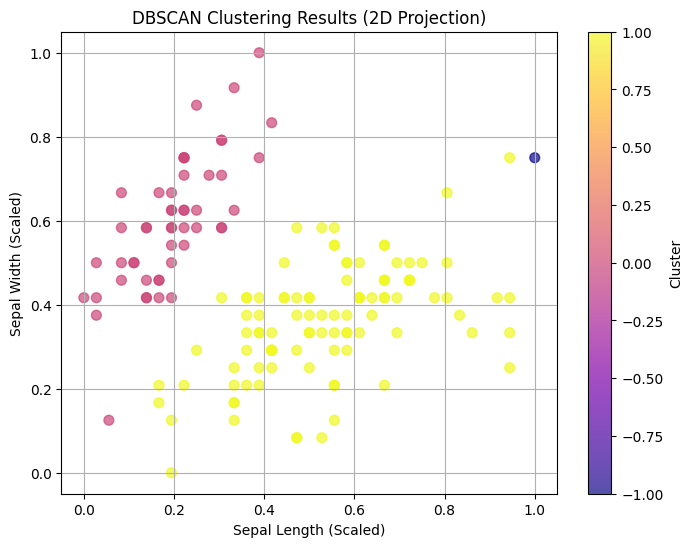

In [11]:
plt.figure(figsize=(8, 6))
plt.scatter(
    scaled_data["sepal length (cm)"],
    scaled_data["sepal width (cm)"],
    c=scaled_data["DBSCAN_Cluster"],
    cmap="plasma",
    s=50,
    alpha=0.7,
)
plt.title("DBSCAN Clustering Results (2D Projection)")
plt.xlabel("Sepal Length (Scaled)")
plt.ylabel("Sepal Width (Scaled)")
plt.colorbar(label="Cluster")
plt.grid(True)
plt.show()

### **Step 6: Evaluation Metrics**

#### *Evaluate K-Means*

In [12]:
kmeans_silhouette = silhouette_score(
    scaled_data.drop(columns=["KMeans_Cluster", "DBSCAN_Cluster"]), kmeans_labels
)
kmeans_davies_bouldin = davies_bouldin_score(
    scaled_data.drop(columns=["KMeans_Cluster", "DBSCAN_Cluster"]), kmeans_labels
)

#### *Evaluate DBSCAN*

In [13]:
# Ignore noise points (-1) for silhouette score
dbscan_silhouette = silhouette_score(
    scaled_data.drop(columns=["KMeans_Cluster", "DBSCAN_Cluster"]),
    dbscan_labels,
) if len(set(dbscan_labels)) > 1 else "Not Applicable (Only 1 Cluster)"

dbscan_davies_bouldin = (
    davies_bouldin_score(
        scaled_data.drop(columns=["KMeans_Cluster", "DBSCAN_Cluster"]), dbscan_labels
    )
    if len(set(dbscan_labels)) > 1
    else "Not Applicable (Only 1 Cluster)"
)

### **step 7: Display Results**

In [14]:
print("Performance Metrics:")
print(f"K-Means Silhouette Score: {kmeans_silhouette:.2f}")
print(f"K-Means Davies-Bouldin Index: {kmeans_davies_bouldin:.2f}")
print(f"DBSCAN Silhouette Score: {dbscan_silhouette}")
print(f"DBSCAN Davies-Bouldin Index: {dbscan_davies_bouldin}")

Performance Metrics:
K-Means Silhouette Score: 0.48
K-Means Davies-Bouldin Index: 0.79
DBSCAN Silhouette Score: 0.4681853590627469
DBSCAN Davies-Bouldin Index: 0.46485967658937666
